<h1>Mall customers dataset </h1>

<h4> The aim of this exercise is to segment the customers based on their age, gender, and interest. This is called "Customer segmentation" and is an important practise of dividing customers based on individual groups that are similar. It is useful in customised marketing.</h4>

<h4>Customer segmentation</h4>
<p>Customer Segmentation is the process of division of customer base into several groups of individuals that share a similarity in different ways that are relevant to marketing such as gender, age, interests, and miscellaneous spending habits.

Companies that deploy customer segmentation are under the notion that every customer has different requirements and require a specific marketing effort to address them appropriately. Companies aim to gain a deeper approach of the customer they are targeting. Therefore, their aim has to be specific and should be tailored to address the requirements of each and every individual customer. Furthermore, through the data collected, companies can gain a deeper understanding of customer preferences as well as the requirements for discovering valuable segments that would reap them maximum profit. This way, they can strategize their marketing techniques more efficiently and minimize the possibility of risk to their investment.

The technique of customer segmentation is dependent on several key differentiators that divide customers into groups to be targeted. Data related to demographics, geography, economic status as well as behavioral patterns play a crucial role in determining the company direction towards addressing the various segments.</p>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
cust = pd.read_csv("mall_Customers_data.csv")
cust.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Let's fist do basic visualisation to understand the data and the distribution of the different variables

#### Gender

Text(0.5, 1.0, 'Customer Gender')

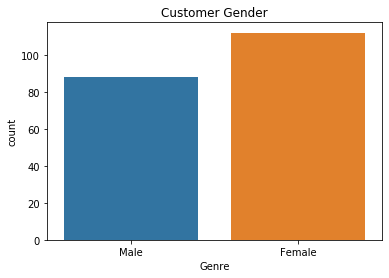

In [3]:
#let's look at the men and women via histogram

sns.countplot(x='Genre', data=cust)
plt.title('Customer Gender')

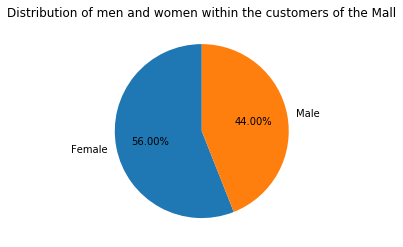

In [4]:
#to make a piechart:
gender=cust.Genre.value_counts()
gender_label=['Female','Male']
plt.pie(gender, labels=gender_label, autopct='%0.2f%%',startangle=90)
plt.title('Distribution of men and women within the customers of the Mall')
plt.show()

#### Age distribution

In [5]:
#let's see the max and min of ages
cust.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<p>The minimum age is 18 and the maximum is 70. We can create 6 bins to group people by age group. Each bin could represent 10 years</p>

Text(0.5, 1.0, 'Age distribution of customers')

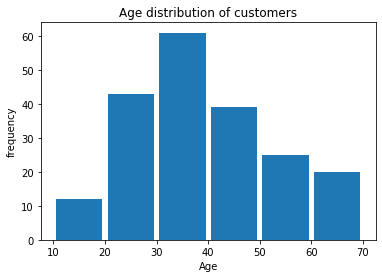

In [6]:
bin_list=[10,20,30,40,50,60,70]
plt.hist(cust['Age'], bins=bin_list, rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('frequency')
plt.title('Age distribution of customers')

#### Annual income of customers

Text(0.5, 1.0, 'Annual income of customers')

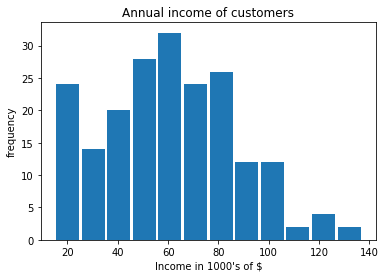

In [7]:
plt.hist(cust['Annual Income (k$)'], bins=12, rwidth=0.9)
plt.xlabel("Income in 1000's of $")
plt.ylabel("frequency")
plt.title('Annual income of customers')

#### Spending score of the customers

Text(0.5, 1.0, 'Spending Score of customers')

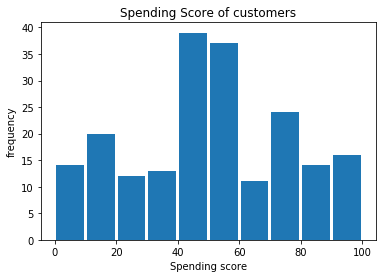

In [8]:
plt.hist(cust['Spending Score (1-100)'], bins=[0,10,20,30,40,50,60,70,80,90,100], rwidth=0.9)
plt.xlabel("Spending score")
plt.ylabel("frequency")
plt.title('Spending Score of customers')

<p>The gender in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets change these variables and transform them to an indicator variable (or dummy variable). This is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. In our case, let's change male to "0" and female to "1".</p>

In [9]:
#let's also drop the customer ID because it's not important
cust.drop("CustomerID", axis = 1, inplace=True)
#cust.drop("Genre", axis = 1, inplace=True)


cust["Genre"].replace("Male", 0, inplace=True)
cust["Genre"].replace("Female", 1, inplace=True)
cust

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


## Modelling

### Let's start by visualising the relationship between different variable groups.
<p>We are interested primarily in those who have a high spending score because this is the category we want to keep as customers for the mall. So let's check if there is a relationship between age and spending score, and annual income and spending score.</p>

### Gender and spending

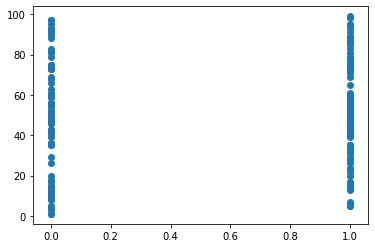

In [10]:
plt.scatter(cust['Genre'], cust['Spending Score (1-100)'])

<p>It's hard to see clusters or relationships in this graph. That's mainly because the gender category has two distinct variables. Therefore, we will remove the gender from our analysis in order to make it simpler.</p>

### Age and spending

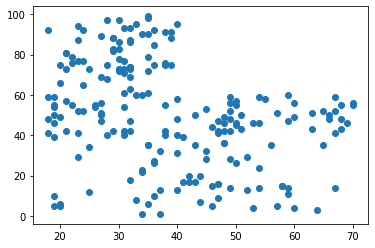

In [11]:
plt.scatter(cust['Age'], cust['Spending Score (1-100)'])

<p>It appears that there is some sort of correlation between being younger (less than 35 yo) and spending more, while the relatively older people are spending less than 60%. This graphs shows therefore 2 clusters.
</p>

### Income and spending

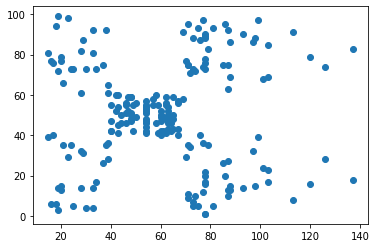

In [12]:
plt.scatter(cust['Annual Income (k$)'], cust['Spending Score (1-100)'])

<p>In this graph, however, it's obvious that there are 5 groups, or clusters, in this dataset if we compare annual income and the spending score, and this is probably what we are interested in seing. Let's evaluate this more below.</p>

## K-mean clustering

<p>Lets apply k-means on our dataset, and take look at cluster labels.</p>

The KMeans class has many parameters that can be used, but we will be using these three:

<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 5 (we can change this anytime if we want to test more values)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: automatic but can be chosen if needed </li> </ul>
</ul>

Let's initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

### Age vs spending clustering
<p>Let's test cluster number 2 to verify what we saw in the 'Age' vs 'Spending score' graph.
First, we will only keep the Age and the Spending score column to simplify the dimensions and keep them in 2D.
</p>

In [13]:
#Let's have a new dataframe first with only the Age and the spending score

cust_age=cust.drop(["Annual Income (k$)", "Genre"], axis = 1)

In [14]:
#we can test a cluster number 2 to verify what we saw in the 'Age' vs 'Spending score' graph. 
#However, we will use 4 clusters here as we saw in the elbow plot that 4 is the optimal number. See below

k_means_age=KMeans(n_clusters=4)

#We can also use this code below in case we want to determine the n_init number
#k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 20)

k_means_age.fit(cust_age)
labels = k_means_age.labels_
print(labels)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


<p>Let's see where is the location of the centers

In [15]:
centers_age=k_means_age.cluster_centers_
centers_age

array([[55.70833333, 48.22916667],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [27.61702128, 49.14893617]])

<p>Let's plot a graph to visualise this relationship 

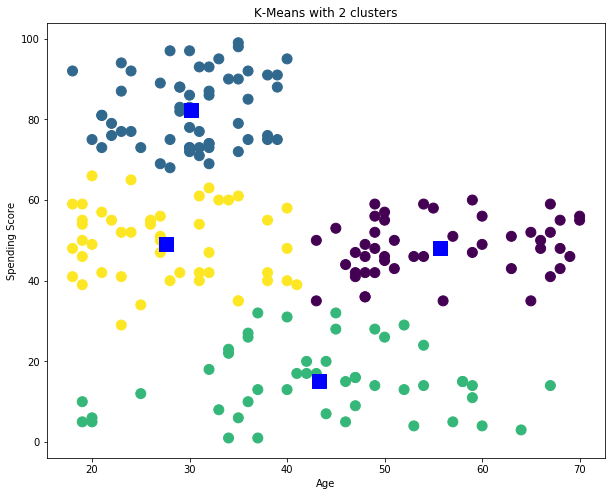

In [16]:
plt.figure(figsize=(10, 8))

plt.scatter(cust_age['Age'], 
            cust_age['Spending Score (1-100)'], 
            c=k_means_age.labels_, s=100)

plt.scatter(centers_age[:,0], centers_age[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')

plt.show()

Let's measure the silhouette score of this clustering:

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

In [17]:
score = silhouette_score (cust_age, k_means_age.labels_)

print("The score is = ", score)

The score is =  0.49973941540141753


<p>This graph shows that we can have 4 clusters based on the Age and the spending score. Therefore, we can have 4 groups:
    <ul>
        <li>Younger people with high spending score</li>
        <li>younger people with average spending score</li>
        <li>People with low spending score of less that 60 that belong to all age groups</li>
        <li>Older people with average spending score.</li>
    </ul>
The score of 0.5 is good. Let's see if we can get it higher.

Let's what is the optimal number of clusters by constructing an elbow plot

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters: age and spending')

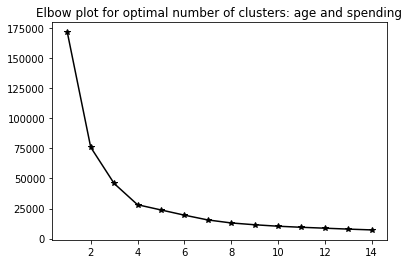

In [18]:
elbowlist1 = []
for i in range(1,15): 
    k_means_age = KMeans(n_clusters=i, init="k-means++",random_state=0)
    k_means_age.fit(cust_age)
    elbowlist1.append(k_means_age.inertia_)  

plt.plot(range(1,15),elbowlist1,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters: age and spending")

Here we can make sure that the cluster number 4 that we chose is correct. The elbow plot has a distinct slope break at 4 indicating that 4 is the optimal cluster number when comparing between age and spending. It's good to construct this plot to make sure that the analysis is ok. We can rerun our analysis by updating the number of clusters based on this plot.

### Annual income vs spending clustering
<p>Let's test now cluster number 5 to verify what we saw in the 'Annual income' vs 'Spending score' graph.
First, we will only keep the Annual income and the Spending score columns to simplify the dimensions and keep them in 2D.
</p>

In [19]:
#we drop the annual income column
cust_income=cust.drop(["Age", "Genre"], axis = 1)

In [20]:
#let's test cluster number 2 to verify what we saw in the 'Age' vs 'Spending score' graph.

k_means_income=KMeans(n_clusters=5)

#We can also use this code below in case we want to determine the n_init number
#k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 20)

k_means_income.fit(cust_income)
labels = k_means_income.labels_
print(labels)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


<p>Let's see where is the location of the centers

In [21]:
centers_income=k_means_income.cluster_centers_
centers_income

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

<p>Let's plot a graph to visualise this relationship 

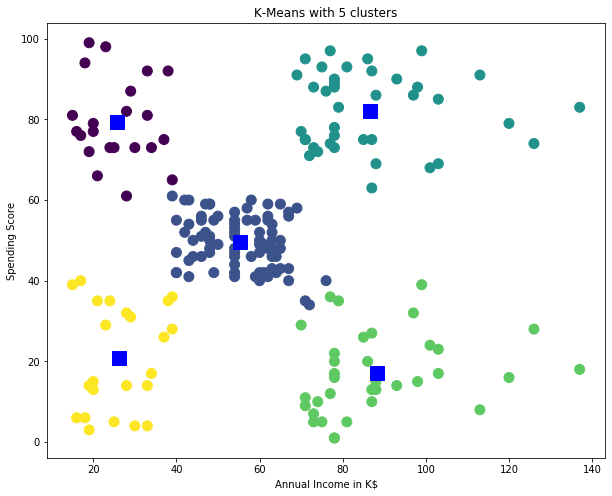

In [22]:
plt.figure(figsize=(10, 8))

plt.scatter(cust_income['Annual Income (k$)'], 
            cust_income['Spending Score (1-100)'], 
            c=k_means_income.labels_, s=100)

plt.scatter(centers_income[:,0], centers_income[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Annual Income in K$')
plt.ylabel('Spending Score')
plt.title('K-Means with 5 clusters')

plt.show()

In [23]:
score_2 = silhouette_score (cust_income, k_means_income.labels_)

print("The score is = ", score_2)

The score is =  0.553931997444648


<p>Here we can see in a much clearer way that there are 5 different clusters belonging to five different groups:
    <ul>
        <li>Low annual income and high spending score --> Interesting category</li>
        <li>High annual income and high spending score --> interesting category</li>
        <li>Low annual income and low spending score --> Not interesting at all </li>
        <li>High annual income and low spending score </li>
        <li>Middge annual income and middle spending score </li>
    </ul>
    
Here we have silhouette score of 0.55 which is better than before. That means that this clustering fits better than the age vs spending one calculated above.
</p>

Let's just make sure that 5 is a good number of clusters by constructing an elbow plot

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters: income and spending')

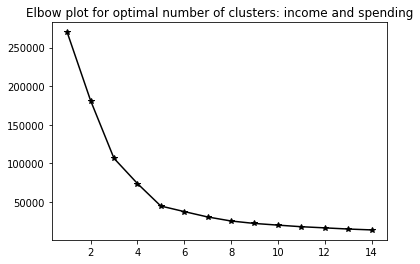

In [24]:
elbowlist2 = []
for i in range(1,15): 
    k_means_income = KMeans(n_clusters=i, init="k-means++",random_state=0)
    k_means_income.fit(cust_income)
    elbowlist2.append(k_means_income.inertia_)  

plt.plot(range(1,15),elbowlist2,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters: income and spending")

Here we can make sure that the cluster number 5 that we chose is correct. The elbow plot has a distinct slope break at 5 indicating that 5 is the optimal cluster number when comparing between income and spending.

#### Visualise the gender distribution in this clustering
<p>However, we might be interested to see if gender plays a role in this classification. We will therefore color some blobs by gender.

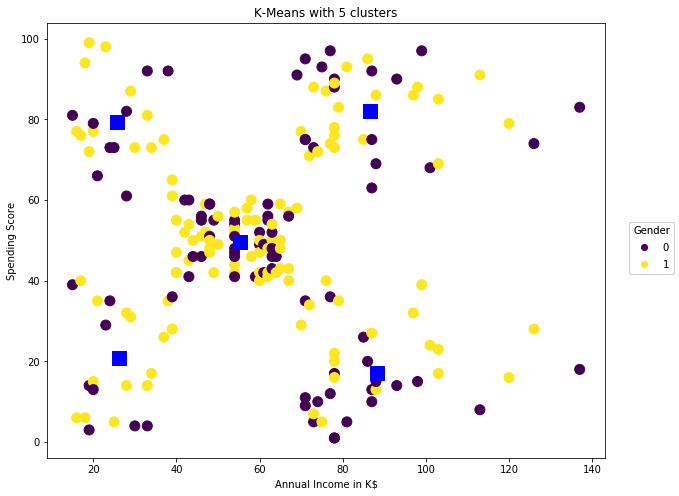

In [25]:
ax=plt.figure(figsize=(10, 8))

scatter=plt.scatter(cust_income['Annual Income (k$)'], 
            cust_income['Spending Score (1-100)'], 
            c=cust['Genre'], s=100)

plt.scatter(centers_income[:,0], centers_income[:,1], color='blue', marker='s', s=200) 

legend1 = ax.legend(*scatter.legend_elements(), loc="right", title="Gender")
ax.add_artist(legend1)

plt.xlabel('Annual Income in K$')
plt.ylabel('Spending Score')
plt.title('K-Means with 5 clusters')

plt.show()

<P>There isn't much difference between gender. One can argue that females might have a higher spending score than men because there are relatively more yellow than purple in the high spending score categories. However, note that there are more females in this dataset than men (56% against 44%) so it's normal to have more females in this graph. Therefore, the gender does not have a noticeable role in this classification.
    
Remember:
<ul>
    <li>male = 0 </li>
    <li>Female = 1 </li>

### Evaluating both age and annual income on clustering

<p>We will use three dimensions for this analysis and visualise results in a 3D graph. We will have an interactive 3D graph to help with visualisation.

In [26]:
#we drop the gender column

cust_3D=cust.drop("Genre", axis = 1)

In [27]:
k_means_3D=KMeans(n_clusters=5)

#We can also use this code below in case we want to determine the n_init number
#k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 20)

k_means_3D.fit(cust_3D)
labels = k_means_3D.labels_
print(labels)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 1 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


In [28]:
centers_3D=k_means_3D.cluster_centers_
centers_3D

array([[40.66666667, 87.75      , 17.58333333],
       [43.08860759, 55.29113924, 49.56962025],
       [45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513],
       [25.52173913, 26.30434783, 78.56521739]])

In [29]:
from matplotlib import interactive
interactive(True)

%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
#plt.ylabel('Age', fontsize=18)
#plt.xlabel('Income', fontsize=16)
#plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Age')
ax.set_ylabel('Income in 1000s $')
ax.set_zlabel('Spending')

ax.scatter(cust_3D['Age'], cust_3D['Annual Income (k$)'], cust_3D['Spending Score (1-100)'], c= labels.astype(np.float), s=200)

#note that it will open in a separate window. Drag the graph and rotate with your mouse to see the results interactively.

#%matplotlib inline    #to add after finishing to go back to charts inside the notebook.

Let's just make sure that 5 is the optimal number of clusters by constructing an elbow plot

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters: age, income and spending')

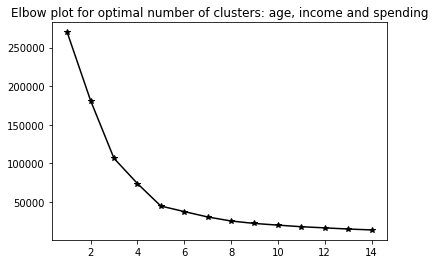

In [33]:
%matplotlib inline   

elbowlist3 = []
for i in range(1,15): 
    k_means_3D = KMeans(n_clusters=i, init="k-means++",random_state=0)
    k_means_3D.fit(cust_income)
    elbowlist3.append(k_means_3D.inertia_)  

plt.plot(range(1,15),elbowlist3,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters: age, income and spending")

Here as well we can notice that the cluster number 5 that we chose is correct. The elbow plot has a distinct slope break at 5 indicating that 5 is the optimal cluster number when comparing between age, income and spending.

In [34]:
score_3 = silhouette_score (cust_3D, k_means_3D.labels_)

print("The score is = ", score_3)

The score is =  0.22597995291424083


<p>The 3D graph is highly informative because we can visualise 3 dimensions in a single graph. Usually, using multiple dimensions in clustering is very challeging, but here we succeeded in visualising 3 dimensions by using a 3D graph. In this case, we linked the age, the income and the spending and we got better results. The 5 customer segments that use the mall are as follow:    
    <ul>
        <li>Young (20-40 yo) , high income and high spending (yellow)</li>
        <li>Young (15 to 30 yo), low income and high spending (purple)</li>
        <li>High income and low spending, they don't have a specific age group (light blue)</li>
        <li>Low income and low spending, they don't have a specific age group (green)</li>
        <li>Average income, average spending, they don't have a specific age group (dark blue)</li>
    </ul>
        
*note that young is considered here as being less than 40

In this cluster model, we have a silhouete score of 0.44. This is less than the previous scores we had. This might be, however, due to the fact that we are measuring in a 3D environment, where the distance between the data points and the origin of the coordinate system grows as a square root of the number of dimensions D. Consequently, the mean distance between data points diverges and looses its meaning which in turn leads to the divergence of the Euclidean distance, the most common distance used for clustering. Therefore, it is better to neglect the fact that this score is the least in our examples. 

--> --> --> Check that nice article by Nikolay Oskolkov on high dimension clustering: https://towardsdatascience.com/how-to-cluster-in-high-dimensions-4ef693bacc6

        

## Summary

<p>K-mean clustering has been performed over a mall customer dataset to classify customers into different segments. Five customer segments were found having different age, income and spending trends. In order to make it better for the mall management to retain customers and increase sales, it is recommended that management focuses on retaining the following segments:
<ul>
    <li>Rich and high spending people between their 20 and 40's</li>
    <li>Relatively poor and high spending people between their 15 and 30's</li>
    </ul>